In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image = cv2.imread('CoinsA.png')

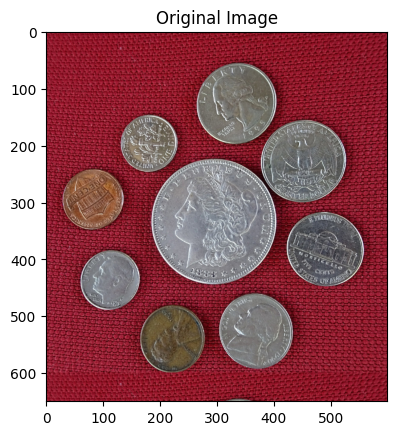

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1])
plt.title("Original Image")
plt.show()

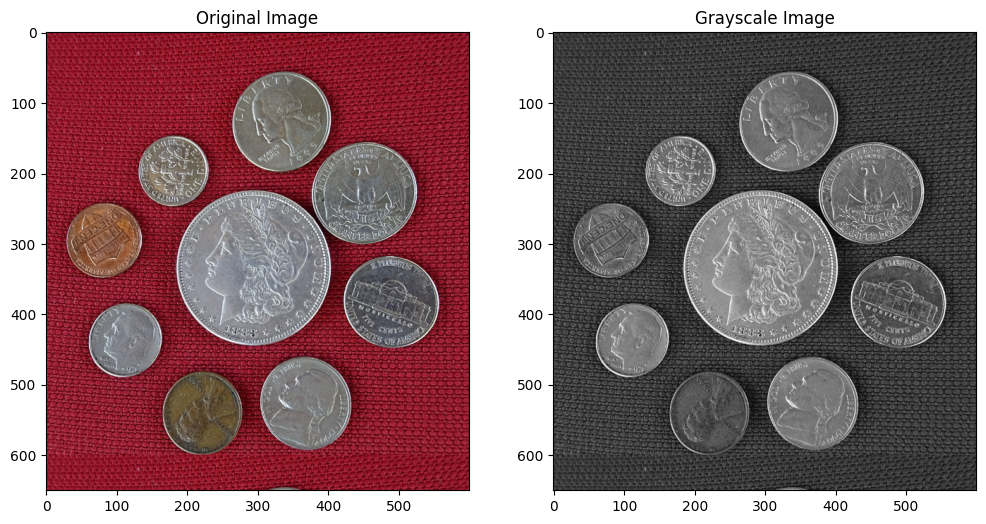

In [4]:
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray, cmap='gray'); plt.title("Grayscale Image")
plt.show()

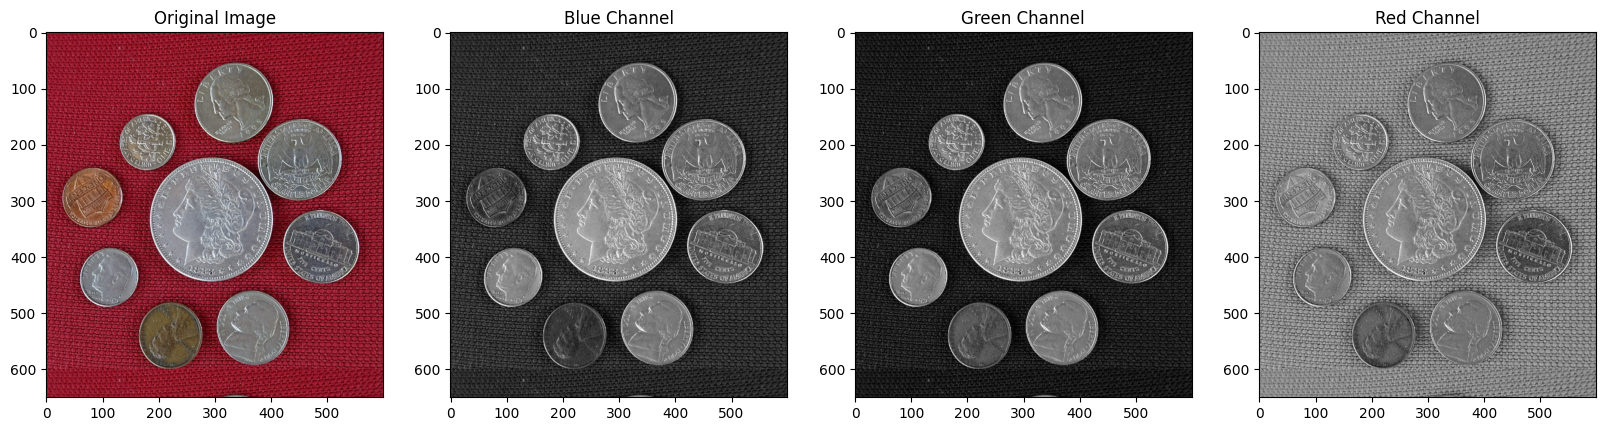

In [5]:
imageB, imageG, imageR = cv2.split(image)
plt.figure(figsize=(20,12))
plt.subplot(141); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(142); plt.imshow(imageB, cmap='gray'); plt.title("Blue Channel")
plt.subplot(143); plt.imshow(imageG, cmap='gray'); plt.title("Green Channel")
plt.subplot(144); plt.imshow(imageR, cmap='gray'); plt.title("Red Channel")
plt.show()

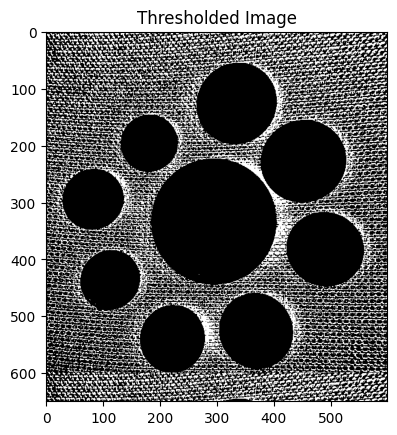

In [13]:
_, imageThresh = cv2.threshold(imageG, 20 , 255, cv2.THRESH_BINARY_INV)
plt.imshow(imageThresh, cmap='gray')
plt.title("Thresholded Image")
plt.show()

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
imageDilated1 = cv2.dilate(imageThresh, kernel, iterations=1)
imageDilated2 = cv2.dilate(imageThresh, kernel, iterations=2)

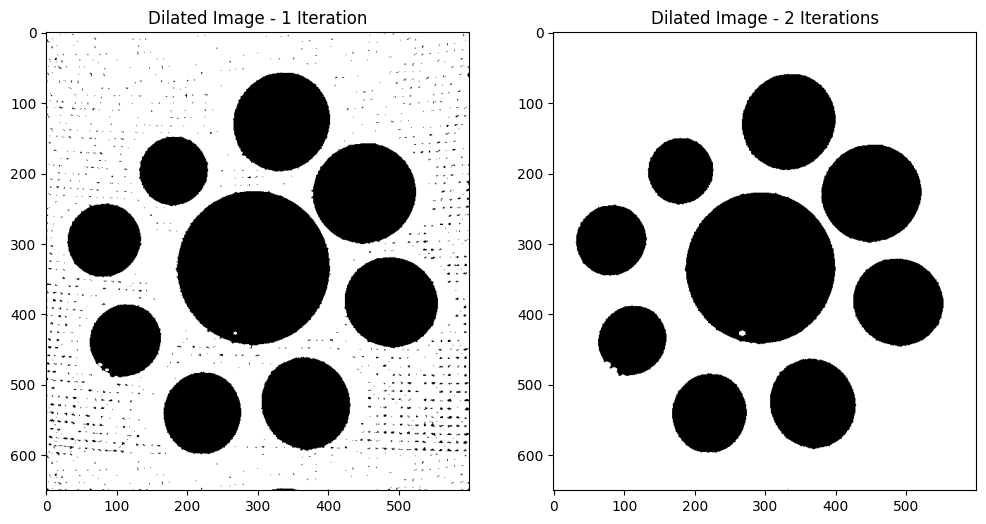

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(121); plt.imshow(imageDilated1, cmap='gray'); plt.title("Dilated Image - 1 Iteration")
plt.subplot(122); plt.imshow(imageDilated2, cmap='gray'); plt.title("Dilated Image - 2 Iterations")
plt.show()


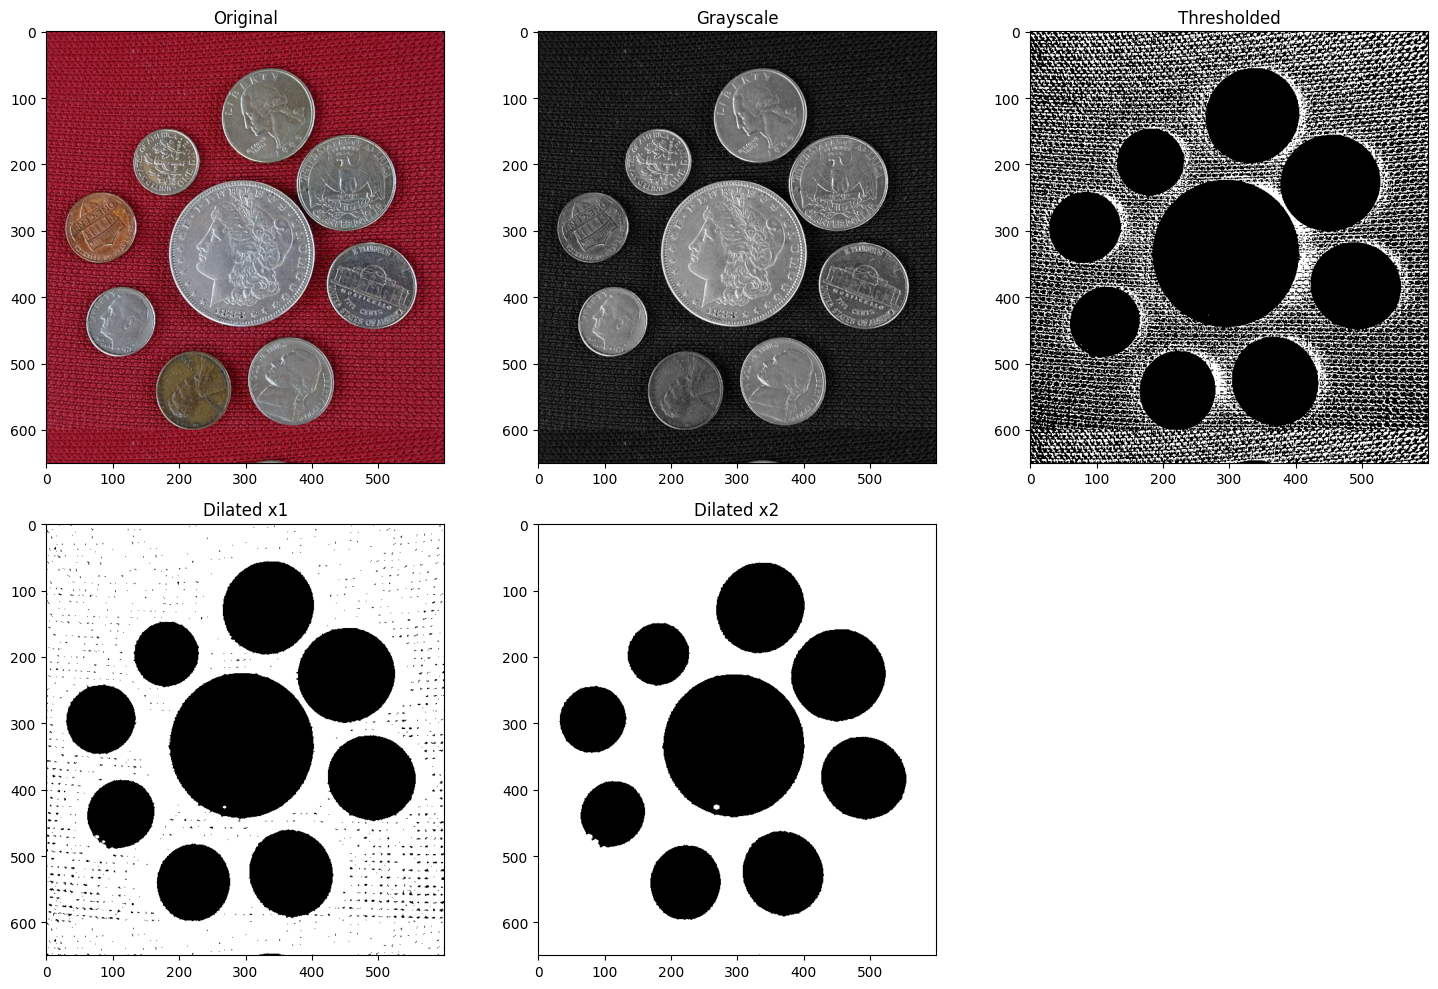

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(231); plt.imshow(image[:,:,::-1]); plt.title("Original")
plt.subplot(232); plt.imshow(imageG, cmap='gray'); plt.title("Grayscale")
plt.subplot(233); plt.imshow(imageThresh, cmap='gray'); plt.title("Thresholded")
plt.subplot(234); plt.imshow(imageDilated1, cmap='gray'); plt.title("Dilated x1")
plt.subplot(235); plt.imshow(imageDilated2, cmap='gray'); plt.title("Dilated x2")
plt.tight_layout()
plt.show()

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))


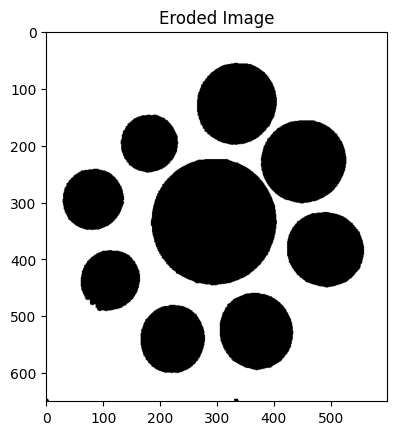

In [28]:
imageEroded = cv2.erode(imageDilated2, kernel, iterations=1)
plt.imshow(imageEroded, cmap='gray')
plt.title("Eroded Image")
plt.show()

In [29]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [30]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

In [31]:
keypoints = detector.detect(imageEroded)

In [32]:
print(f"Number of coins detected: {len(keypoints)}")

Number of coins detected: 9
